In [1]:
# imports
import random
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Training data
def sine(a,b,c,x):
    return a * np.sin(2*np.pi*b * x + c)

num_signals = 100
x_data = np.arange(0,10,0.001)
a_list = np.linspace(0.1,10,num_signals)
b_list = np.linspace(0.1,6,num_signals)
c_list = np.linspace(0,5,num_signals)

y_data = [0] * len(a_list)
for i in range(0,len(a_list)):
    random.shuffle(b_list)
    random.shuffle(c_list)
    if i <= 60:
        y_data[i] = sine(a_list[i], b_list[i], c_list[i], x_data) + np.random.normal(-a_list[i],a_list[i],len(x_data))
        y_data[i] = np.append(y_data[i], 1)   #boolean: 1 = there is a sine signal, 0 = just noise
    else:       
        y_data[i] = np.random.normal(-a_list[i],a_list[i],len(x_data))  # 40 noise datasets with no signal
        y_data[i] = np.append(y_data[i], -1)

y_data = np.array(y_data)

test_frac = 0.2
test_sel = np.random.choice([True, False], size=num_signals, p=[test_frac, 1-test_frac])
random.shuffle(test_sel)
y_test = y_data[test_sel]
y_train = y_data[~test_sel]

In [75]:
# Regression
def train_lr(y_data, eta, lam):
    w = [0.0] * len(x_data)
    b = 0.0

    for iter in range(0, MAX_ITERS): 
        dw = np.zeros_like(w)
        db = 0

        for row in y_data: 
            y = np.array(row[:-1])
            #y = y.flatten()
            true_class = row[-1]

            wy = np.dot(w,y)

            #loss += np.log10(1 + np.exp(-y*(wx+b)))
            dw += -(true_class*y/(1+np.exp(true_class*(wy+b))))
            db += -(true_class/(1+np.exp(true_class*(wy+b))))

        #loss += l2_reg_weight / 2 * np.dot(w, w)

        gradient = np.sqrt(np.sum(dw**2) + db**2)
        if gradient < 0.0001:
            print('Converged after '+str(iter+1)+' iterations.')
            break
        
        w = np.array(w)
        w = w - eta*(dw + lam * w)
        b = b - eta*db

    return (w, b)

In [76]:
def predict_lr(model, y):
    (w, b) = model
    
    Py1 = 1/(1+np.exp(-np.dot(w,y)-b))

    return Py1 

In [105]:
# Set hyperparameters
eta = 1
MAX_ITERS = 300
lam = 0.00001

In [106]:
(w, b) = train_lr(y_train, eta, lam)

Converged after 9 iterations.


/tmp/ipykernel_31200/2701785029.py:18: RuntimeWarning: overflow encountered in exp
  dw += -(true_class*y/(1+np.exp(true_class*(wy+b))))
/tmp/ipykernel_31200/2701785029.py:19: RuntimeWarning: overflow encountered in exp
  db += -(true_class/(1+np.exp(true_class*(wy+b))))


/tmp/ipykernel_31200/527920854.py:4: RuntimeWarning: overflow encountered in exp
  Py1 = 1/(1+np.exp(-np.dot(w,y)-b))


Accuracy:  0.6111111111111112
[11, 0, 1, 6]


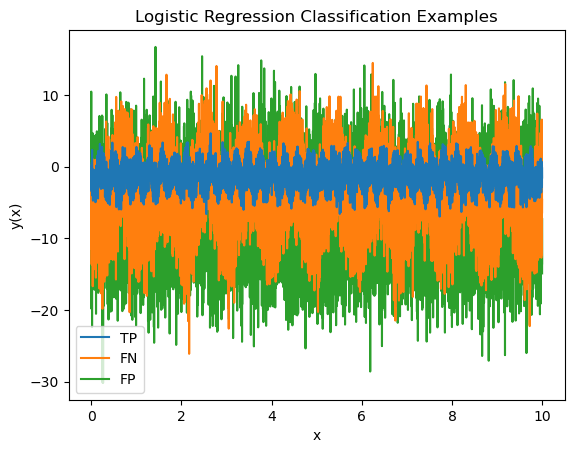

In [108]:
# Make predictions, compute accuracy
correct = 0
TP_TN_FN_FP = [0,0,0,0]
for row in y_test:
    y = np.array(row[:-1])
    #y = y.flatten()
    true_class = row[-1]
    prob = predict_lr((w, b), y)
    if (prob - 0.5) * true_class > 0:
        correct += 1
        if true_class == 1:
            if TP_TN_FN_FP[0] == 0:
                plt.plot(x_data, y, label='TP', zorder=4)
            TP_TN_FN_FP[0] += 1
        if true_class == -1:
            if TP_TN_FN_FP[1] == 0:
                plt.plot(x_data, y, label='TN')
            TP_TN_FN_FP[1] += 1
    else:
        if true_class == 1:
            if TP_TN_FN_FP[2] == 0:
                plt.plot(x_data, y, label='FN',zorder=3)
            TP_TN_FN_FP[2] += 1
        if true_class == -1:
            if TP_TN_FN_FP[3] == 0:
                plt.plot(x_data, y, label='FP')
            TP_TN_FN_FP[3] += 1

acc = float(correct) / len(y_test)
print("Accuracy: ", acc)
print(TP_TN_FN_FP)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Logistic Regression Classification Examples')
plt.legend();